# Курс Глубокое обучение в компьютерном зрении/ Урок 1. Обработка изображений и компьютерное зрение

## Задание
Напишите на Python реализацию как минимум одного алгоритма на выбор: любая на выбор цветовая обработка, перевод в другое цветовое пространство или фильтрация. Изображение выберите самостоятельно.

## Решение


In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

import imageio

### Загрузка цветного изображения

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
data_path = '/content/drive/My Drive/Colab Notebooks/116_ComputerView/less_01/hw_1/Secretariat.jpg'
img =  imageio.imread(data_path)

In [5]:
img = img.astype(np.float32) / 255.
print(img.shape)

(707, 1024, 3)


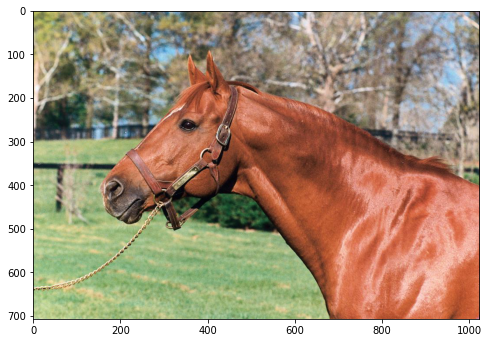

In [6]:
plt.figure(figsize=(8, 8))
plt.imshow(img)

### Линейное уменьшение яркости

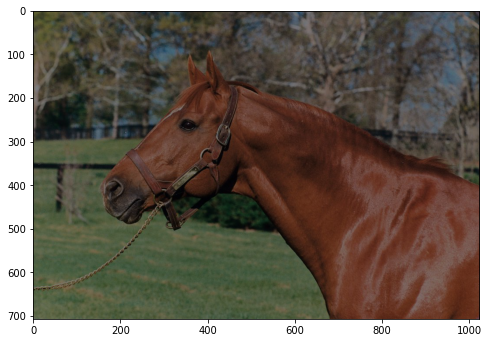

In [7]:
plt.figure(figsize=(8, 8))
plt.imshow(img/2)

### Линейное увеличение яркости
Возможен выход за пределы допустимого диапазона


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


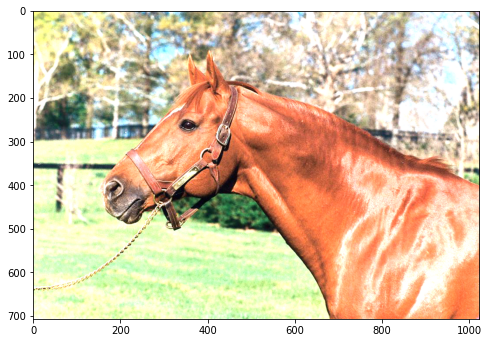

In [8]:
plt.figure(figsize=(8, 8))
plt.imshow(img*1.5)

### Нелинейное уменьшение яркости

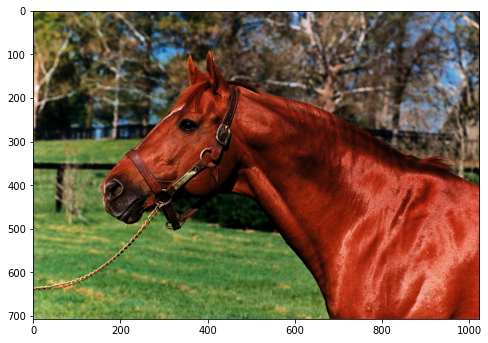

In [9]:
plt.figure(figsize=(8, 8))
plt.imshow(img**2) # возведение в квадрат

### Нелинейное увеличение яркости

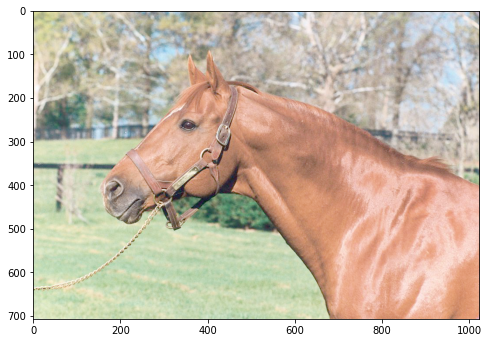

In [10]:
plt.figure(figsize=(8, 8))
plt.imshow(img**0.5) # извлечение квадратного корня

### Получение ЧБ изображения по цветному

In [11]:
img_bw = np.mean(img, axis=2)

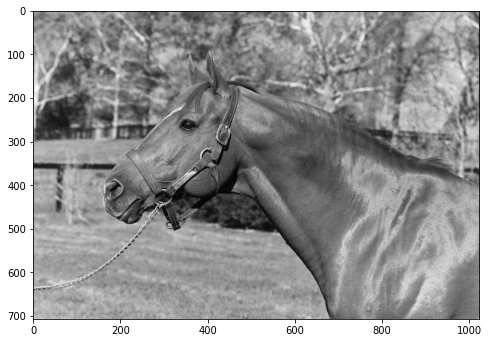

In [12]:
plt.figure(figsize=(8, 8))
plt.imshow(img_bw, cmap='gray')

### Цветовое пространство HSV

In [13]:
from skimage.color import rgb2hsv, hsv2rgb

In [14]:
img_hsv = rgb2hsv(img)

In [15]:
img_hsv[:5, :5, :]

array([[[0.17575757, 0.32738096, 0.65882355],
        [0.1754386 , 0.33333334, 0.67058825],
        [0.17759562, 0.36094674, 0.6627451 ],
        [0.17929292, 0.4074074 , 0.63529414],
        [0.18055554, 0.44720498, 0.6313726 ]],

       [[0.1754386 , 0.33727813, 0.6627451 ],
        [0.1779661 , 0.33714288, 0.6862745 ],
        [0.1796875 , 0.36363637, 0.6901961 ],
        [0.17910449, 0.39411765, 0.6666667 ],
        [0.18018019, 0.43786982, 0.6627451 ]],

       [[0.16944444, 0.35714287, 0.65882355],
        [0.17195767, 0.36      , 0.6862745 ],
        [0.17171717, 0.3687151 , 0.7019608 ],
        [0.17370892, 0.40112996, 0.69411767],
        [0.17532468, 0.4375    , 0.6901961 ]],

       [[0.17171717, 0.39520958, 0.654902  ],
        [0.17391305, 0.3942857 , 0.6862745 ],
        [0.17567568, 0.4065934 , 0.7137255 ],
        [0.17532468, 0.42307693, 0.7137255 ],
        [0.17682926, 0.45555556, 0.7058824 ]],

       [[0.1711111 , 0.44117647, 0.6666667 ],
        [0.1711111 , 0.428

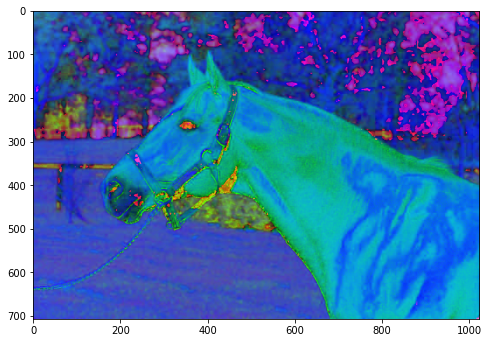

In [16]:
plt.figure(figsize=(8, 8))
plt.imshow(img_hsv)

### Линейное уменьшение насыщенности

In [17]:
img_hsv_new = np.copy(img_hsv)
img_hsv_new[:, :, 1] /= 3
img_new = hsv2rgb(img_hsv_new)

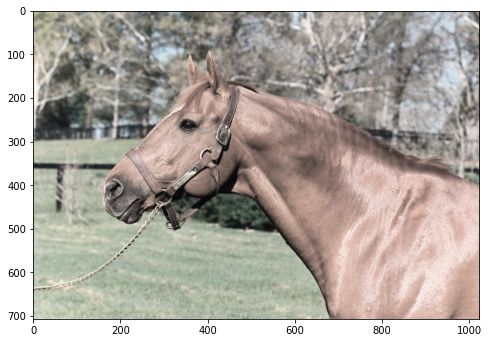

In [18]:
plt.figure(figsize=(8, 8))
plt.imshow(img_new)

### Линейное увеличение насыщенности
Возможен выход за пределы допустимого диапазона

In [19]:
img_hsv_new = np.copy(img_hsv)
img_hsv_new[:, :, 1] *= 4
img_new = hsv2rgb(img_hsv_new)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


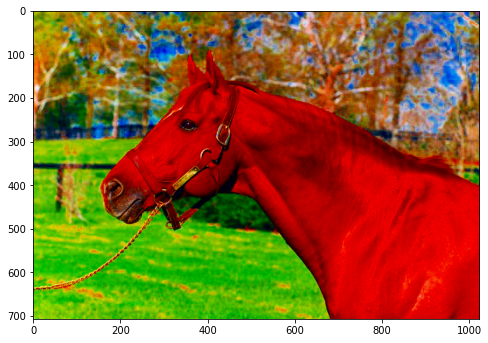

In [20]:
plt.figure(figsize=(8, 8))
plt.imshow(img_new)

### Изменение тона

In [21]:
img_hsv_new = np.copy(img_hsv)
img_hsv_new[:, :, 0] /= 3
img_new = hsv2rgb(img_hsv_new)

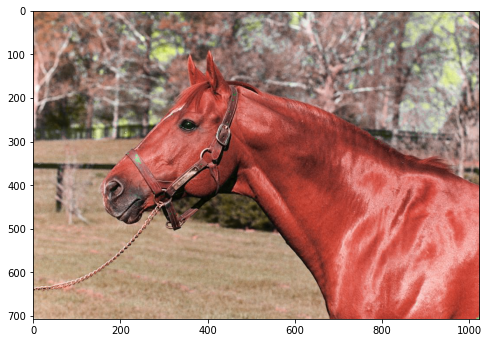

In [22]:
plt.figure(figsize=(8, 8))
plt.imshow(img_new)

### Свёртка цветного изображения

In [23]:
def conv(img, w):
    out_img = np.zeros(
        (img.shape[0] - w.shape[0] + 1,
         img.shape[1] - w.shape[1] + 1,
         img.shape[2]), 
         dtype=np.float32)
    
    for c in range(out_img.shape[2]):
        for i in range(out_img.shape[0]):
            for j in range(out_img.shape[1]):
                x = img[i:i+w.shape[0], j:j+w.shape[1], c]
        
                out_img[i,j,c] = np.sum(w * x)
    
    return out_img

In [24]:
# Gaussian blur
win_size = (11, 11)
sigma = 3
w = np.zeros(win_size, dtype=np.float32)
for i in range(w.shape[0]):
    for j in range(w.shape[1]):
        w[i,j] = np.exp(-(i-w.shape[0]//2)**2 / sigma**2 / 2 
                        -(j-w.shape[1]//2)**2 / sigma**2 / 2)
w = w / np.sum(w)

new_img = conv(img, w)

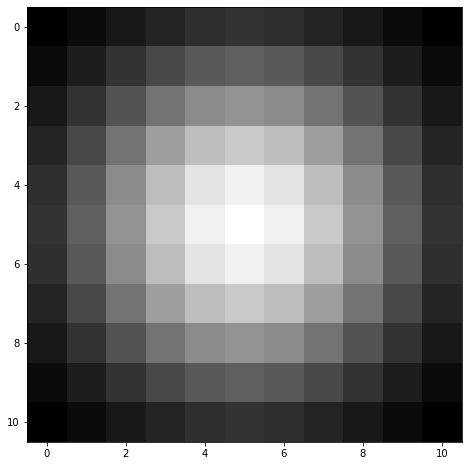

In [25]:
plt.figure(figsize=(8, 8))
plt.imshow(w, cmap='gray')
plt.show()

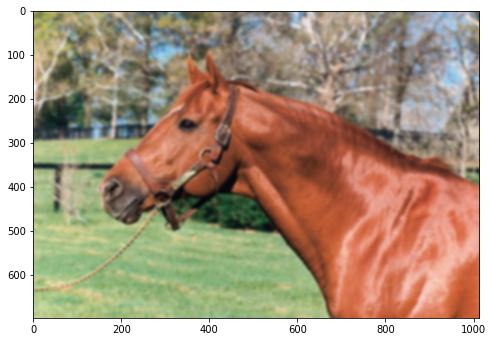

In [26]:
plt.figure(figsize=(8, 8))
plt.imshow(new_img)
plt.show()

### Свёртка через библиотеку scipy.signal

In [27]:
import scipy.signal

In [28]:
%%time

out_img = []
for c in range(3):
    out_img.append(scipy.signal.correlate2d(img[:,:,c], w, mode='valid'))
out_img = np.stack(out_img, axis=2)

CPU times: user 910 ms, sys: 1.96 ms, total: 912 ms
Wall time: 912 ms


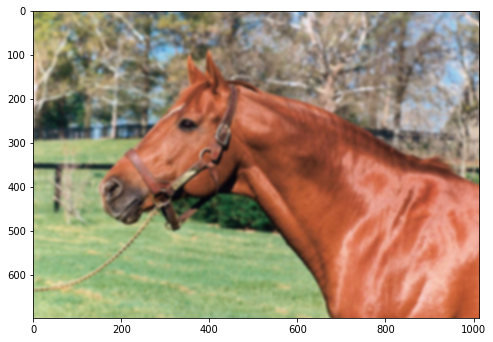

In [29]:
plt.figure(figsize=(8, 8))
plt.imshow(out_img)

### Использование SciPy для размытия ЧБ изображения с помощью фильтра Гаусса

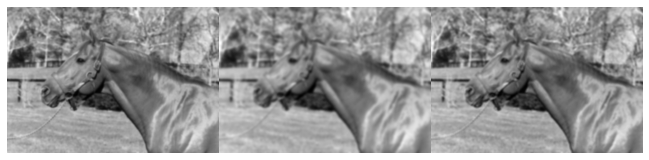

In [37]:
from scipy import ndimage

blurred_img = ndimage.gaussian_filter(img_bw, sigma=3)
very_blurred = ndimage.gaussian_filter(img_bw, sigma=5)

#Результаты
local_mean = ndimage.uniform_filter(img_bw, size=11)

plt.figure(figsize=(9, 3))
plt.subplot(131)
plt.imshow(blurred_img, cmap=plt.cm.gray)
plt.axis('off')
plt.subplot(132)
plt.imshow(very_blurred, cmap=plt.cm.gray)
plt.axis('off')
plt.subplot(133)
plt.imshow(local_mean, cmap=plt.cm.gray)
plt.axis('off')

plt.subplots_adjust(wspace=0, hspace=0., top=0.99, bottom=0.01,
                    left=0.01, right=0.99)

plt.show()